# **Assignment: K-Means Clustering for Customer Segmentation**

## **Objective**  
Perform **K-Means clustering** to segment customers into different groups based on their annual income and spending score. The goal is to identify patterns in customer data and group them accordingly.

---

## **Dataset**  
Download the **Mall Customers dataset** from Kaggle:  
🔗 [Mall Customers Dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)  

- Load the **Mall_Customers.csv** dataset into a Pandas DataFrame and display the first few rows to understand the structure.
- The **"Annual Income (k$)"** and **"Spending Score (1-100)"** columns will be used as features for clustering.
- The **"Gender"** column can be ignored for clustering, as we are not using it for the current task.

---

## **Feature Description**  
- **Target Feature:** None (Unsupervised learning task)  
- **Features for Clustering:**  
  - **Annual Income (k$)** (Annual income in thousands of dollars)
  - **Spending Score (1-100)** (A score given based on the customer's spending behavior)

---

## **Tasks**  

### **1. Data Preprocessing**  
- Load the **Mall Customers dataset** and check for missing values.  
- Standardize the features **Annual Income** and **Spending Score** using **StandardScaler** (this is important for K-Means).

---

### **2. Perform K-Means Clustering**  
- Apply **K-Means clustering** with different values of `k` (the number of clusters). Start by setting `k = 5`.
- Visualize the clusters on a 2D plot using **Matplotlib** or **Seaborn**.  
- Use the **Elbow Method** to determine the optimal number of clusters by plotting the **Within-cluster Sum of Squares (WCSS)** for different values of `k`.

---

### **3. Hyperparameter Tuning**  
- Perform the **Elbow Method** to find the optimal value of `k` (number of clusters).  
- Try different values of `k` (e.g., 3, 4, 6, etc.) and evaluate the cluster formation.

---

### **4. Model Evaluation**  
- After determining the optimal number of clusters, label the dataset with cluster assignments and examine the resulting clusters.
- Plot a **scatter plot** to visualize the clusters and their centroids (for two features: **Annual Income** vs. **Spending Score**).
- Compare the cluster centers (centroids) for different `k` values.

---


## **Submission Guidelines**  
- Submit a **Colab Notebook (.ipynb)** with code and visualizations.  


In [70]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [71]:
dataset.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


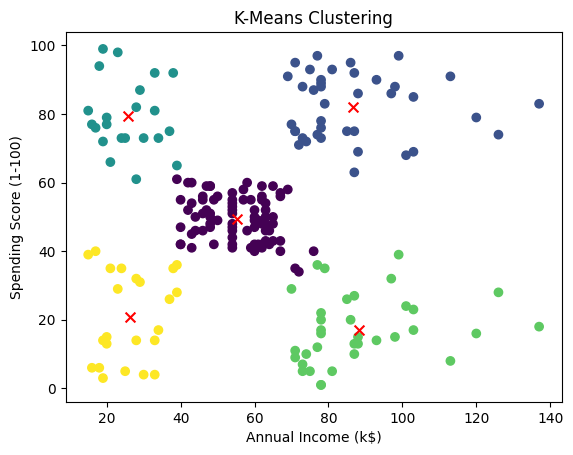

In [73]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(x_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Inverse transform the centroids back to the original scale
centroids_original_scale = scaler.inverse_transform(centroids)

plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=labels, cmap = 'viridis')
plt.scatter(centroids_original_scale[:,0], centroids_original_scale[:,1], marker = 'x', s = 50, c = 'red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()

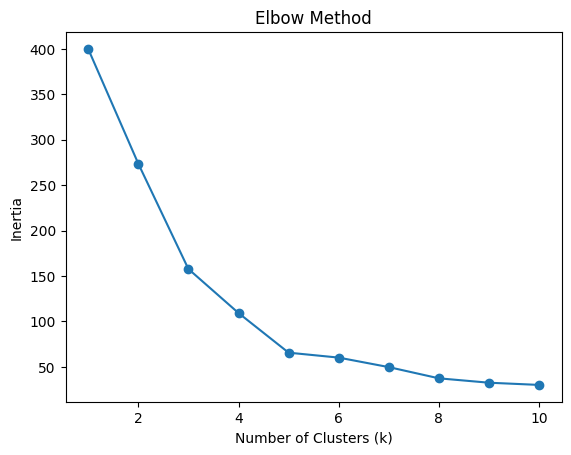

In [74]:
inertia = []

for k in range(1,11):
  kmeans_new = KMeans(n_clusters = k, random_state=42)
  kmeans_new.fit(x_scaled)
  inertia.append(kmeans_new.inertia_)

plt.plot(range(1,11), inertia, marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


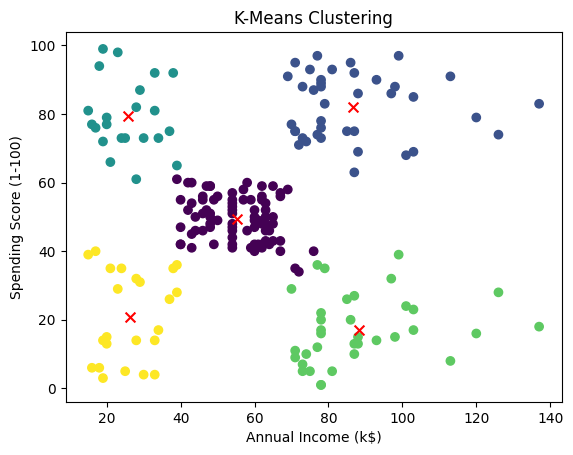

In [75]:
best_k = 5
kmeans_best = KMeans(n_clusters = best_k, random_state = 42)
kmeans_best.fit(x_scaled)

labels_best = kmeans_best.labels_
centroids_best = kmeans_best.cluster_centers_

centroids_original_scale_best = scaler.inverse_transform(centroids_best)

plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=labels_best, cmap = 'viridis')
plt.scatter(centroids_original_scale_best[:,0], centroids_original_scale_best[:,1], marker = 'x', s = 50, c = 'red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()

In [76]:
print(f"The best number of clusters is {best_k} because after that point the distance of cluster points between each other decreases darastically and at that point the rate of decrease in inertia slows down darastically.")

The best number of clusters is 5 because after that point the distance of cluster points between each other decreases darastically and at that point the rate of decrease in inertia slows down darastically.
